TO SET UP A MEMORY IN LANGGRAPH

In [25]:
from langchain_groq import ChatGroq
from langgraph.graph import START,StateGraph,END
from typing import Annotated
from typing import TypedDict
from IPython.display import display,Image
from langgraph.graph.message import add_messages
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode,tools_condition
from langchain.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [26]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [27]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [28]:
llm=ChatGroq(model="gemma2-9b-it")

In [29]:
llm.invoke("what is gen ai")

AIMessage(content='"Gen AI" is short for **Generative Artificial Intelligence**. \n\nIt\'s a type of artificial intelligence focused on creating new content, rather than simply analyzing existing data.  Think of it as AI that can *generate* things like:\n\n* **Text:**  Stories, poems, articles, code, scripts, emails, letters\n* **Images:** Photos, artwork, illustrations, 3D models\n* **Audio:** Music, sound effects, voiceovers\n* **Video:** Short clips, animations\n* **Other data:**  Chemical compounds, protein structures\n\n**How it Works:**\n\nGen AI models are typically trained on massive datasets of existing content. \n\nThey learn the patterns and structures within that data, and then use that knowledge to create new content that resembles the training data.  \n\nA popular example is **GPT-3**, which can generate human-quality text.\n\n**Key Features:**\n\n* **Creativity:** Gen AI can come up with original ideas and produce novel content.\n* **Efficiency:** It can automate content

In [30]:
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [31]:
search=TavilySearchResults()

In [32]:
search.invoke("which team won the 2011 cricket world cup")

[{'url': 'https://wcwinners.com/icc-winners/icc-wc-2011/',
  'content': 'India won the tournament, defeating Sri Lanka by six wickets in the final at Wankidi Stadium in Mumbai, thus becoming the first country to win a Cricket World Cup Final on home soil. Pakistan loses its status as host In April 2009, the International Criminal Court announced that Pakistan had lost its right to co-host the 2011 World Cup due to concerns about the “uncertain security situation” in the country, particularly in the wake of the 2009 attack on Sri Lanka’s national cricket team in Lahore. ICC Men’s T20 Cricket World Cup 2021 Winners List and Runners-Up Awards™ ICC World Cup 2015 Final History | ICC Cricket World Cup 2015 Winner And Runner UP List And info ICC Men’s Cricket World Cup 2019 Winners List and Runners-Up'},
 {'url': 'http://news.bbc.co.uk/sport2/hi/cricket/8350950.stm',
  'content': 'ICC Cricket World Cup 2011 - full results & highlights FINAL. Saturday, 2 April India v Sri Lanka, Mumbai (d/n) 

In [33]:
tools=[search]

In [34]:
llm_with_tool=llm.bind_tools(tools=tools)

In [35]:
tool_node=ToolNode(tools=tools)

In [36]:
class AgentState(TypedDict):
    messages:Annotated[list,add_messages]

In [37]:
def function_1(state:AgentState):
    print("==> entering into the llm <==")
    response=llm_with_tool.invoke(state["messages"])
    return {"messages":[response]}

In [38]:
graph=StateGraph(AgentState)

In [39]:
graph.add_node("llm",function_1)
graph.add_node("tools",tool_node)
graph.set_entry_point("llm")

graph.add_conditional_edges(
    "llm",
    tools_condition
)

graph.add_edge("tools","llm")

In [42]:
from langgraph.checkpoint.memory import MemorySaver

In [45]:
memory=MemorySaver()

In [46]:
app=graph.compile(checkpointer=memory)

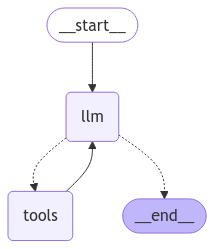

In [47]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except  Exception as e:
    print(e)

In [48]:
config={"configurable":{"thread_id":1}}

In [50]:
events=app.stream({"messages":["which team won the 2011 cricket world cup"]},config=config,stream_mode='values')

In [52]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

==> entering into the llm <==
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_fht5)
 Call ID: call_fht5
  Args:
    query: which team won the 2011 cricket world cup
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://wcwinners.com/icc-winners/icc-wc-2011/", "content": "India won the tournament, defeating Sri Lanka by six wickets in the final at Wankidi Stadium in Mumbai, thus becoming the first country to win a Cricket World Cup Final on home soil. Pakistan loses its status as host In April 2009, the International Criminal Court announced that Pakistan had lost its right to co-host the 2011 World Cup due to concerns about the “uncertain security situation” in the country, particularly in the wake of the 2009 attack on Sri Lanka’s national cricket team in Lahore. ICC Men’s T20 Cricket World Cup 2021 Winners List and Runners-Up A

In [53]:
events=app.stream({"messages":["what is the captain name"]},config=config,stream_mode='values')

In [54]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is the captain name
==> entering into the llm <==
================================== Ai Message ==================================

Mahendra Singh Dhoni


In [55]:
events=app.stream({"messages":["how many runs he scored in that match "]},config=config,stream_mode='values')

In [56]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

how many runs he scored in that match 
==> entering into the llm <==
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_v9yn)
 Call ID: call_v9yn
  Args:
    query: how many runs did MS Dhoni score in the 2011 Cricket World Cup final
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://cricket.one/top-most/2007-2011-2013-ms-dhonis-contributions-in-indias-title-icc-triumphs/64a708284737919e242868b3", "content": "ICC Cricket World Cup 2011. MS Dhoni hits winning run for India against Sri Lanka in the CWC 2011 Final [Source: Twitter] ... In nine WC matches, Dhoni scored 241 runs with one fifty. As a gloveman, Dhoni shined throughout the competition, outfoxing batters with his shard mind and instinctive captaincy, taking seven catches and inflicting three